<a href="https://colab.research.google.com/github/Aditya3392/Python_MachineLearning/blob/main/edge_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

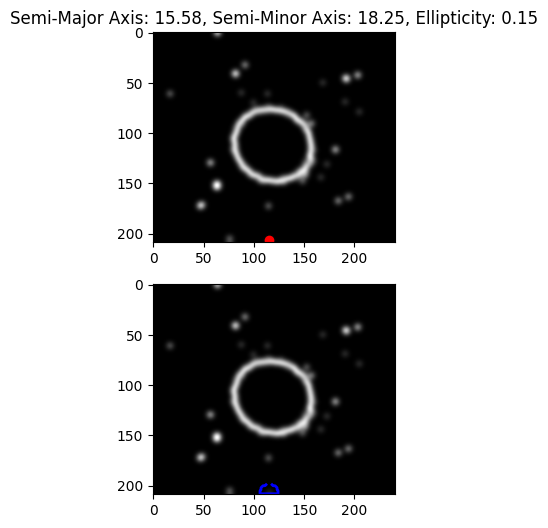

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    return img

# Load the image
image_path = '/content/download.jfif'  # Replace with the actual image path
img_array = [load_image(image_path)]

# Additional image processing: Edge detection using Sobel
gray = cv2.cvtColor(img_array[0], cv2.COLOR_BGR2GRAY)

# Normalize pixel values to be in the range [0, 1]
gray = cv2.normalize(gray, None, 0, 1, cv2.NORM_MINMAX)

# Sobel operator in x and y directions
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

# Compute the magnitude of the gradient
edges = np.sqrt(sobelx**2 + sobely**2)

# Further smoothing using GaussianBlur
smoothed_img = cv2.GaussianBlur(edges, (15, 15), 0)

# Find contours in the smoothed edges
contours, _ = cv2.findContours((smoothed_img * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plot the smoothed edges with the detected ellipse in blue color
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.imshow(smoothed_img, cmap='gray')

if contours:
    # Fit an ellipse to the contour
    ellipse = cv2.fitEllipse(contours[0])

    # Get the semi-major and semi-minor axes lengths directly
    semi_major_axis = ellipse[1][0]
    semi_minor_axis = ellipse[1][1]

   # Corrected ellipticity calculation
if semi_major_axis > semi_minor_axis:
    ellipticity = 1 - semi_minor_axis / semi_major_axis
else:
    ellipticity = 1 - semi_major_axis / semi_minor_axis


    # Plot the ellipse in blue color
    cv2.ellipse(smoothed_img, ellipse, (0, 0, 255), 2)
    plt.scatter(ellipse[0][0], ellipse[0][1], c='r', marker='o', label='Center')
    plt.title(f'Semi-Major Axis: {semi_major_axis:.2f}, Semi-Minor Axis: {semi_minor_axis:.2f}, Ellipticity: {ellipticity:.2f}')

plt.subplot(234)
plt.imshow(smoothed_img, cmap='gray')
if contours:
    plt.plot(contours[0][:, 0, 0], contours[0][:, 0, 1], color='b', linewidth=2)

plt.show()
